In [60]:
import pandas as pd
import numpy as np
import seaborn as sns # використаємо для завантаження датасету
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_colwidth", 300)
pd.set_option("display.precision", 2)

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [43]:
%matplotlib inline

In [61]:
df = pd.read_csv("C:/Users/user11/Documents/Навчання/DataAnalysis/Python/facebook_ads_data.csv")
print(df)

         ad_date campaign_name  total_spend  total_impressions  total_clicks  \
0     2022-11-05     Expansion         0.00                  0             0   
1     2022-11-01     Expansion         0.00                  0             0   
2     2022-10-31     Expansion       227.45               6054            58   
3     2022-10-30     Expansion       335.91              27562            69   
4     2022-10-29     Expansion       714.03              33358           115   
...          ...           ...          ...                ...           ...   
1489  2020-11-15     Discounts         6.98              12465           657   
1490  2020-11-14     Discounts         7.27               5005           392   
1491  2020-11-13     Discounts         6.36              11669           451   
1492  2020-11-12     Discounts        23.00              10473           397   
1493  2020-11-11     Discounts         1.89               1800            45   

      total_value   cpc    cpm       ct

In [62]:
df2021 = df[df["ad_date"].str.contains("2021")]
print(df2021.head())

        ad_date campaign_name  total_spend  total_impressions  total_clicks  \
274  2021-12-31     Lookalike       143.19              24699           194   
275  2021-12-31        Trendy         8.82              25345            63   
276  2021-12-31     Wholesale        21.37               6705            24   
277  2021-12-30     Lookalike       227.56              44527           897   
278  2021-12-30        Trendy        31.92               8833            58   

     total_value   cpc   cpm       ctr  romi  
274       138.86  0.74  5.80  7.85e-03  0.97  
275        16.32  0.14  0.35  2.49e-03  1.85  
276        27.93  0.89  3.19  3.58e-03  1.31  
277       243.02  0.25  5.11  2.01e-02  1.07  
278        63.67  0.55  3.61  6.57e-03  1.99  


1. Графік з щоденною сумою витрат на рекламу в 2021 році та щоденним ROMI в 2021 році

In [69]:
daily_data = df2021.groupby('ad_date').agg({'total_spend': 'sum', 'romi': 'mean'}).reset_index()
print(daily_data)

        ad_date  total_spend  romi
0    2021-01-01         0.39  1.51
1    2021-01-02         7.74  0.89
2    2021-01-04        70.06  0.98
3    2021-01-05        81.15  0.76
4    2021-01-06       142.77  1.01
5    2021-01-07       119.42  1.54
6    2021-01-08        61.97  1.41
7    2021-01-09        53.63  0.76
8    2021-01-10        16.80  0.94
9    2021-01-11        28.46  1.14
10   2021-01-12       136.70  1.34
11   2021-01-13        52.86  1.09
12   2021-01-14         0.72  1.06
13   2021-01-15        78.33  1.64
14   2021-01-16       128.21  1.23
15   2021-01-17        36.66  1.58
16   2021-01-18        30.63  1.02
17   2021-01-19        11.84  1.42
18   2021-01-20        19.05  1.43
19   2021-01-21        17.66  1.47
20   2021-01-22        22.14  1.61
21   2021-01-23         7.11  1.00
22   2021-01-24        21.85  1.35
23   2021-01-25        14.13  1.70
24   2021-01-26        19.87  0.89
25   2021-01-27        25.99  1.09
26   2021-01-28        28.45  1.03
27   2021-01-29     

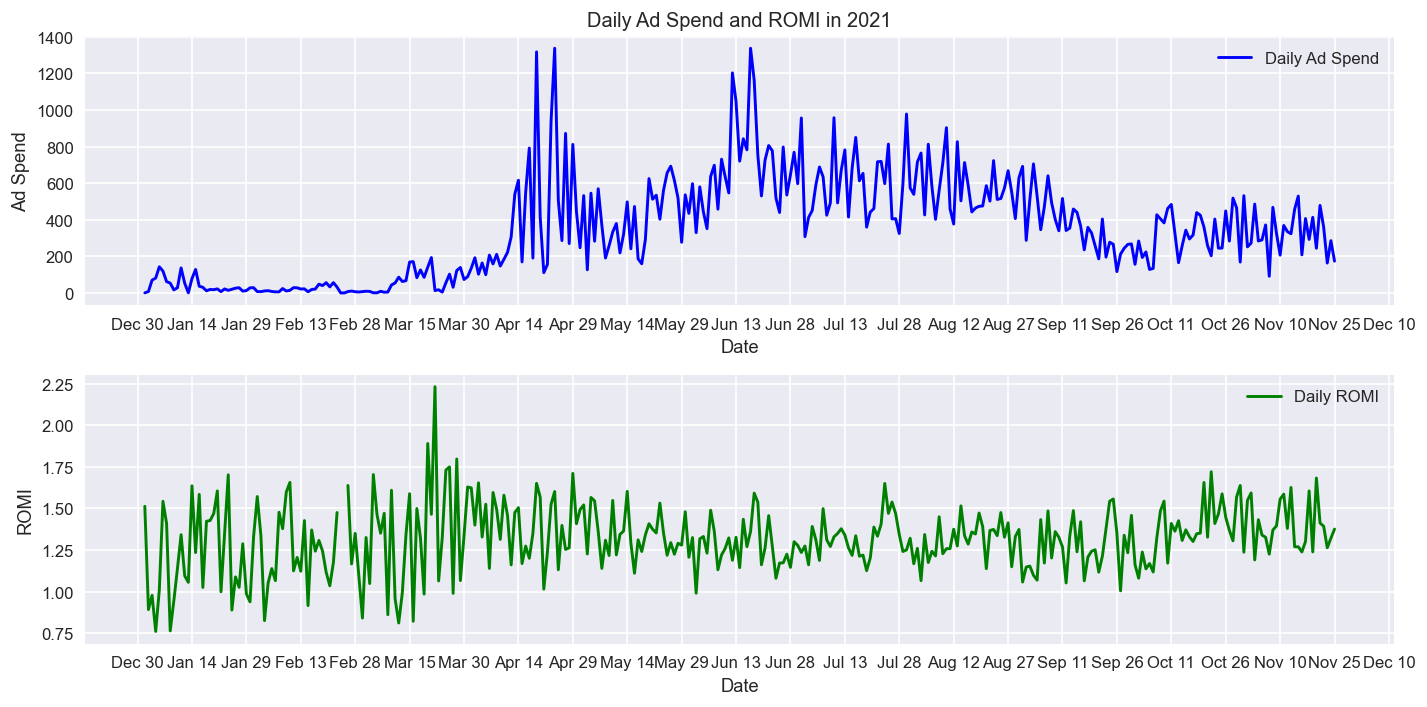

In [76]:
plt.style.use('seaborn-v0_8');
plt.figure(figsize=(12, 6), dpi=120);

plt.subplot(2, 1, 1);
plt.plot(daily_data['ad_date'], daily_data['total_spend'], label='Daily Ad Spend', color='blue');
plt.title('Daily Ad Spend and ROMI in 2021');
plt.xlabel('Date');
plt.ylabel('Ad Spend');
plt.legend();

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15));
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.subplot(2, 1, 2);
plt.plot(daily_data['ad_date'], daily_data['romi'], label='Daily ROMI', color='green');
plt.xlabel('Date');
plt.ylabel('ROMI');
plt.legend();

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15));
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.tight_layout();

2.	Графік загальної суми витрат на рекламу та загальний ROMI в кожній з кампаній

In [79]:
campaign_data = df.groupby('campaign_name').agg({'total_spend': 'sum', 'romi': 'mean'}).reset_index()
print(campaign_data)

      campaign_name  total_spend  romi
0             Brand       539.92  1.24
1   Crazy discounts      2175.29  1.21
2         Discounts      2856.39  1.25
3       Electronics     23920.42  1.23
4         Expansion     67212.82  1.24
5           Hobbies     11326.97  1.24
6         Lookalike     63631.09  1.25
7         New items      2936.97  1.28
8            Promos      4993.84  1.75
9            Trendy      1992.31  1.84
10        Wholesale     14181.71  1.24


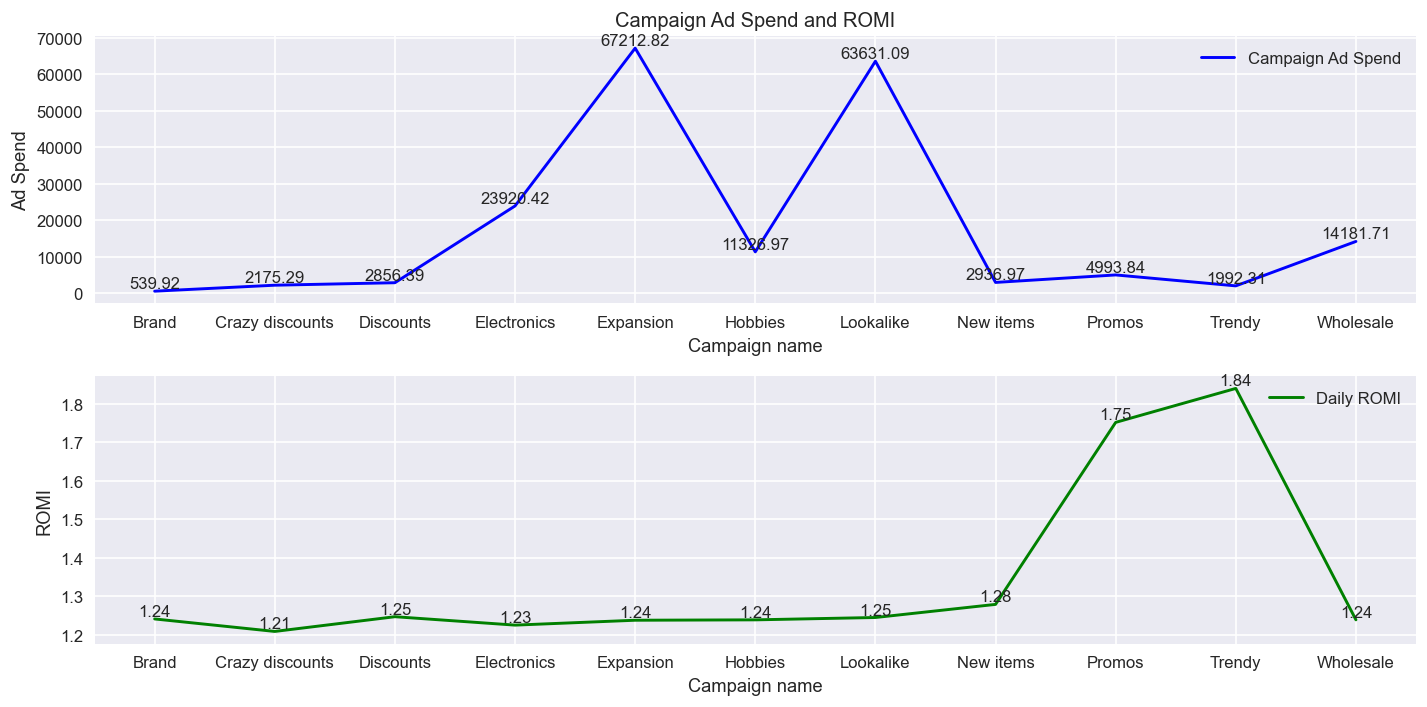

In [145]:
plt.style.use('seaborn-v0_8');
plt.figure(figsize=(12, 6), dpi=120);

plt.subplot(2, 1, 1);
plt.plot(campaign_data['campaign_name'], campaign_data['total_spend'], label='Сampaign Ad Spend', color='blue');
for i, v in zip(campaign_data['campaign_name'], campaign_data['total_spend']):
    plt.annotate(text=round(v, 2), xy=(i, v), ha="center", va="bottom")
plt.title('Сampaign Ad Spend and ROMI');
plt.xlabel('Сampaign name');
plt.ylabel('Ad Spend');
plt.legend();

plt.subplot(2, 1, 2);
plt.plot(campaign_data['campaign_name'], campaign_data['romi'], label='Daily ROMI', color='green');
for i, v in zip(campaign_data['campaign_name'], campaign_data['romi']):
    plt.annotate(text=round(v, 2), xy=(i, v), ha="center", va="bottom")
plt.xlabel('Сampaign name');
plt.ylabel('ROMI');
plt.legend();

plt.tight_layout();

3.	Box plot розкиду щоденного ROMI в кожній кампаній (за назвою кампанії.)

In [97]:
daily_romi = df.groupby(["campaign_name","ad_date"])['romi'].mean().reset_index()
daily_romi = daily_romi.dropna()
print(daily_romi)

     campaign_name     ad_date  romi
0            Brand  2020-12-25  1.54
1            Brand  2020-12-26  1.45
2            Brand  2020-12-27  1.27
3            Brand  2020-12-28  1.32
4            Brand  2020-12-29  0.83
...            ...         ...   ...
1484     Wholesale  2021-12-27  1.04
1485     Wholesale  2021-12-28  1.18
1486     Wholesale  2021-12-29  1.17
1487     Wholesale  2021-12-30  0.90
1488     Wholesale  2021-12-31  1.31

[1462 rows x 3 columns]


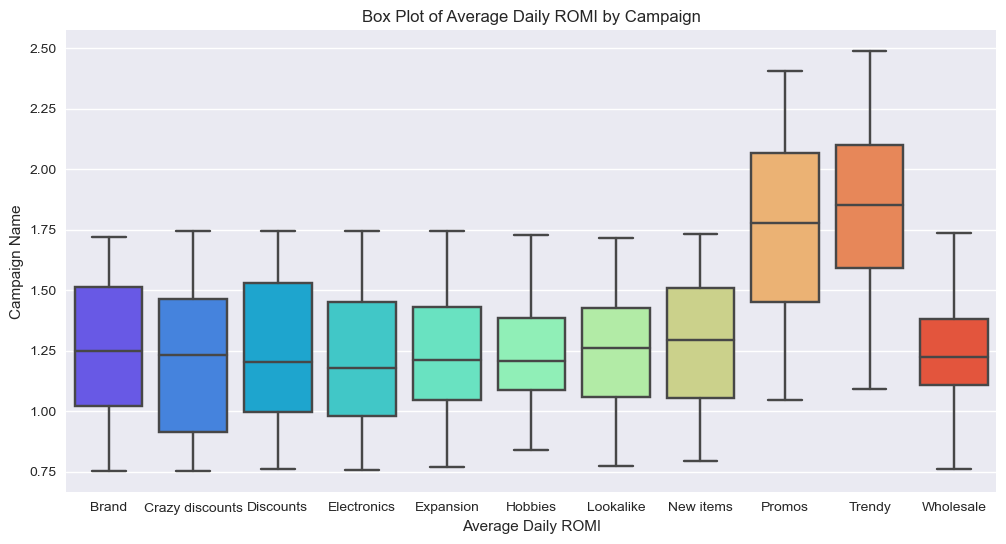

In [147]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="campaign_name", y="romi", data=daily_romi, palette='rainbow')
plt.title('Box Plot of Average Daily ROMI by Campaign')
plt.xlabel('Average Daily ROMI')
plt.ylabel('Campaign Name')
plt.show();

4. Гістограма з розподілом значень ROMI

<Figure size 1200x600 with 0 Axes>

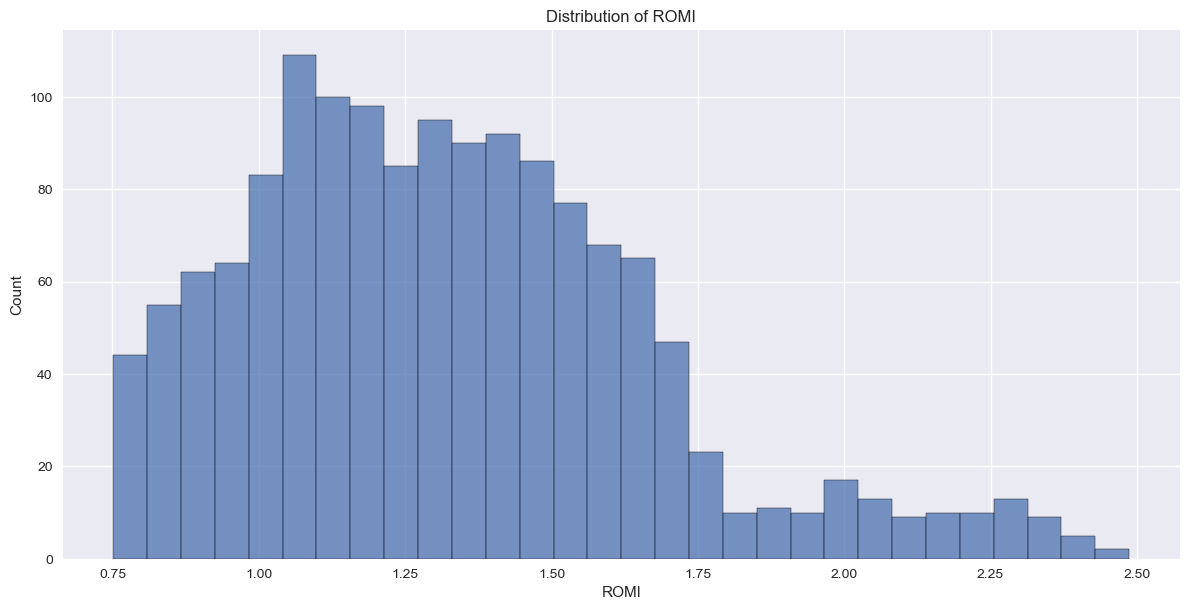

In [139]:
plt.figure(figsize=(12, 6));
sns.displot(df['romi'], bins=30, );
plt.title('Distribution of ROMI');
plt.xlabel('ROMI');
#plt.ylabel('Campaign Name')
plt.show();

5. Теплова карта кореляції між усіма числовими показниками

In [112]:
df_corr = df[['total_spend','total_impressions','total_clicks','total_value','cpc','cpm','ctr','romi']]
df_corr = df_corr.dropna()
print(df_corr)

      total_spend  total_impressions  total_clicks  total_value   cpc     cpm  \
2          227.45               6054            58       191.87  3.92   37.57   
3          335.91              27562            69       472.61  4.87   12.19   
4          714.03              33358           115       680.34  6.21   21.41   
5          630.33               5522           121       590.00  5.21  114.15   
6          359.63              45223            87       376.69  4.13    7.95   
...           ...                ...           ...          ...   ...     ...   
1489         6.98              12465           657        10.96  0.01    0.56   
1490         7.27               5005           392        12.67  0.02    1.45   
1491         6.36              11669           451         9.77  0.01    0.55   
1492        23.00              10473           397        21.13  0.06    2.20   
1493         1.89               1800            45         2.38  0.04    1.05   

           ctr  romi  
2   

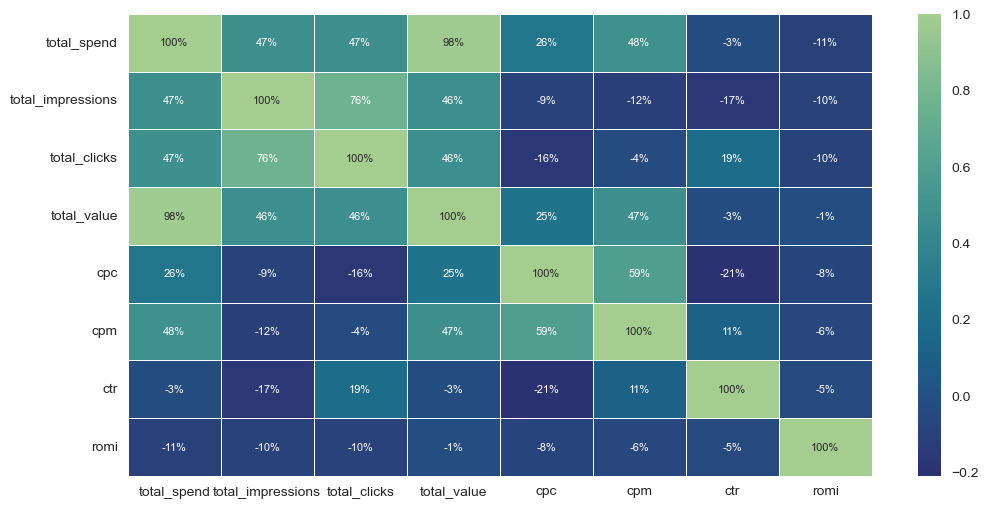

In [138]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_corr.corr(), cmap="crest_r", annot=True, fmt=".0%", annot_kws={"fontsize": 8}, linewidths=.5)
plt.show();

6. Точкова діаграму з лінійною регресією, що побудована на даних з "total_spend" та "total_value".

<Figure size 1200x600 with 0 Axes>

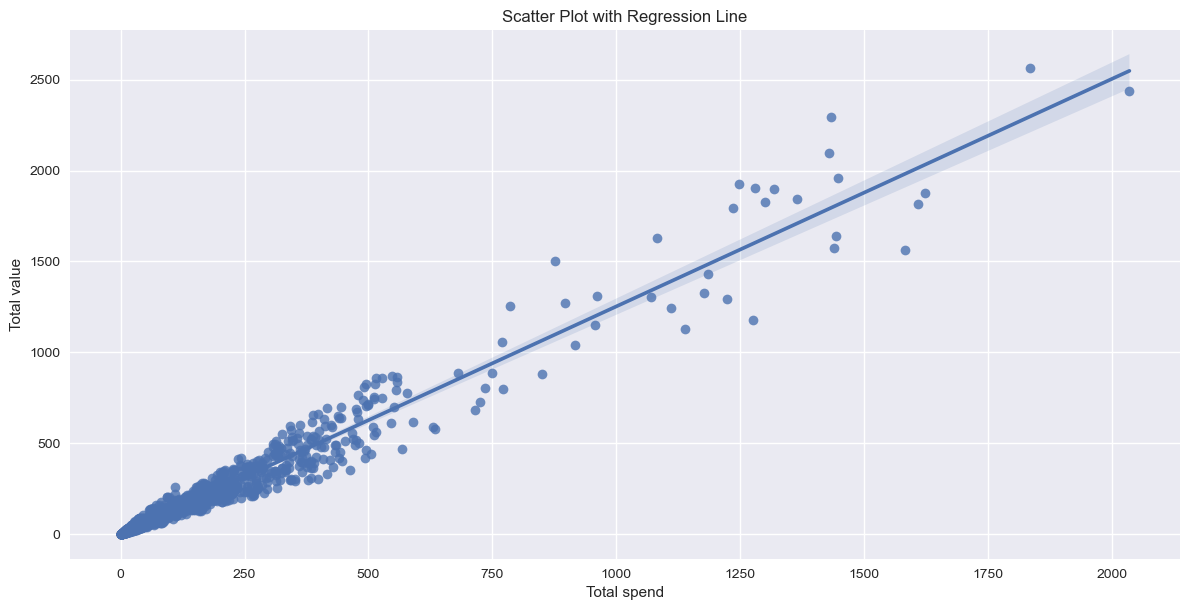

In [134]:
plt.figure(figsize=(12, 6));
sns.lmplot(x="total_spend", y="total_value", data=df, height=6, aspect=2);
plt.title('Scatter Plot with Regression Line');
plt.xlabel('Total spend');
plt.ylabel('Total value');
plt.show();